In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
import pickle
%matplotlib inline

In [58]:
can_data = pd.read_csv("C:/Users/Ashkan Golgoon/Cancer_Wisconsin.csv")

In [59]:
can_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
can_data.shape

(569, 33)

In [61]:
can_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [62]:
can_data = can_data.drop(['id','Unnamed: 32'], axis=1) #let's get rid of the ids as they are immaterial in cancer prediction analysis
#Unnamed: 32 is also unnecessary NaN

In [63]:
can_data['diagnosis'] = can_data['diagnosis'].apply(lambda x: '0' if x =='B' else '1')

In [64]:
X_B = can_data.loc[can_data.diagnosis == '0'] #Seperating the Malignant set

In [65]:
X_M = can_data.loc[can_data.diagnosis == '1'] #Seperating the Malignant set

In [66]:
X_B.shape

(357, 31)

In [67]:
X_M.shape

(212, 31)

In [68]:
can_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
area_mean_list = list(X_M.loc[:,'area_mean'])
from collections import Counter
area_mean_counted_list = Counter(area_mean_list)
area_mean_counted_list.most_common(20)

[(1076.0, 2),
 (1075.0, 2),
 (1264.0, 2),
 (1138.0, 2),
 (1214.0, 2),
 (716.6, 2),
 (758.6, 2),
 (1001.0, 1),
 (1326.0, 1),
 (1203.0, 1),
 (386.1, 1),
 (1297.0, 1),
 (477.1, 1),
 (1040.0, 1),
 (577.9, 1),
 (519.8, 1),
 (475.9, 1),
 (797.8, 1),
 (781.0, 1),
 (1123.0, 1)]

In [70]:
area_mean_list = list(X_M.loc[:,'symmetry_worst'])
from collections import Counter
area_mean_counted_list = Counter(area_mean_list)
area_mean_counted_list.most_common(20)

[(0.3613, 2),
 (0.3585, 2),
 (0.3109, 2),
 (0.3216, 2),
 (0.3103, 2),
 (0.3258, 2),
 (0.251, 2),
 (0.4601, 1),
 (0.275, 1),
 (0.6638, 1),
 (0.2364, 1),
 (0.3985, 1),
 (0.3063, 1),
 (0.3196, 1),
 (0.4378, 1),
 (0.4366, 1),
 (0.2948, 1),
 (0.3792, 1),
 (0.3176, 1),
 (0.2809, 1)]

In [71]:
texture_mean_list = list(X_M.loc[:,'texture_mean'])
from collections import Counter
texture_mean_counted_list = Counter(texture_mean_list)
texture_mean_counted_list.most_common(20)

[(19.98, 2),
 (23.95, 2),
 (22.15, 2),
 (20.25, 2),
 (18.7, 2),
 (21.59, 2),
 (21.46, 2),
 (19.83, 2),
 (20.2, 2),
 (23.21, 2),
 (20.26, 2),
 (23.29, 2),
 (20.52, 2),
 (10.38, 1),
 (17.77, 1),
 (21.25, 1),
 (20.38, 1),
 (14.34, 1),
 (15.7, 1),
 (20.83, 1)]

In [72]:
compactness_mean_list = list(X_M.loc[:,'compactness_mean'])
from collections import Counter
compactness_mean_counted_list = Counter(texture_mean_list)
compactness_mean_counted_list.most_common(20)

[(19.98, 2),
 (23.95, 2),
 (22.15, 2),
 (20.25, 2),
 (18.7, 2),
 (21.59, 2),
 (21.46, 2),
 (19.83, 2),
 (20.2, 2),
 (23.21, 2),
 (20.26, 2),
 (23.29, 2),
 (20.52, 2),
 (10.38, 1),
 (17.77, 1),
 (21.25, 1),
 (20.38, 1),
 (14.34, 1),
 (15.7, 1),
 (20.83, 1)]

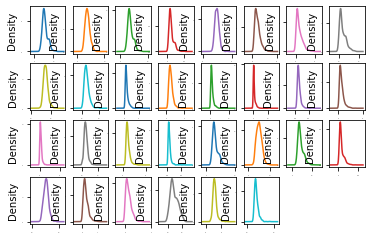

In [73]:
can_data.plot(kind='density', subplots=True, layout=(4,8), sharex=False, legend=False, fontsize=1)
plt.show()

In [74]:
Y = can_data['diagnosis'].values
X = can_data.drop('diagnosis', axis=1).values 

In [75]:
Y.shape

(569,)

In [76]:
X.shape

(569, 30)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state = 8)

In [78]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [79]:
def switcher(arg):
    if   arg == 'CART':
        return DecisionTreeClassifier()
    elif arg == 'SVM':
        return SVC()
    elif arg == 'NB':
        return GaussianNB()
    else:
        return KNeighborsClassifier()

In [80]:
num_folds = 10
name = 'SVM'
kfold = KFold(n_splits=num_folds, random_state=123)
start = time.time()
results = cross_val_score(switcher(name), X_train, Y_train, cv=kfold, scoring = 'accuracy')
end = time.time()
print(name + ": " + str(results.mean()) + " (" + str(results.std()) + ") " + "run time: " + str(end-start))

C:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

SVM: 0.6355072463768116 (0.07988335740305005) run time: 0.2264258861541748


In [81]:
#we need scale the data for SVM, all other classifiers perform really well with acuuracy of around 90%

In [82]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
num_folds = 10
results = []
kfold = KFold(n_splits=num_folds, random_state=123)
start = time.time()
results = cross_val_score(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), X_train, Y_train, cv=kfold, scoring = 'accuracy')
end = time.time()
print(name + ": " + str(results.mean()) + " (" + str(results.std()) + ") " + "run time: " + str(end-start))

SVM: 0.9120772946859903 (0.026068162849186834) run time: 0.04886651039123535


In [84]:
#you can see that scaling the data substantially improve the SVM accuracy from 60% to 90%

In [85]:
#Let's use Gaussian Naive Bayes Classifier

In [86]:
#Let's scale the data:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [87]:
X_train_scaled.shape

(455, 30)

In [88]:
model = GaussianNB()
model.fit(X_train_scaled,Y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
predictions = model.predict(X_test_scaled)
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.956140350877193
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.98      0.91      0.94        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [89]:
#Let's check if Min-Max scaling does a better job?
X_train_mm_scaled = MinMaxScaler().fit_transform(X_train)

In [90]:
model = GaussianNB()
model.fit(X_train_mm_scaled,Y_train)
X_test_mm_scaled = MinMaxScaler().fit_transform(X_test)
predictions = model.predict(X_test_mm_scaled)
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8947368421052632
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        68
           1       0.80      0.98      0.88        46

    accuracy                           0.89       114
   macro avg       0.89      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114



In [ ]:
#you can see that the model accuracy becomes worst